# Total AF prediction

In [1]:
from warnings import simplefilter
simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

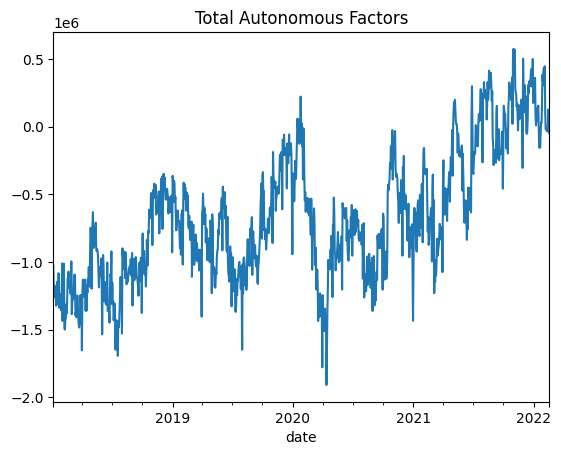

In [3]:
CIC = pd.read_excel('../data/CIC.xlsx', parse_dates=['date'], index_col='date')
NFA = pd.read_excel('../data/NFA.xlsx', parse_dates=['date'], index_col='date')
SAB = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')
data = pd.concat([CIC, NFA, SAB], axis=1)
data['Total'] = data['CIC'] + data['SAB'] - data['NFA']
data['Total'].plot(title = 'Total Autonomous Factors'); plt.show()

## Section 2: Model Definition

In [4]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastAutoTBATS,
)

In [5]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 1),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=5),
    "AutoCES": StatsForecastAutoCES(season_length=5),
    "AutoTheta": StatsForecastAutoTheta(season_length=5),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=5, use_trend =True, use_boxcox=True),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'Total',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

Importing plotly failed. Interactive plots will not work.


### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


<Axes: title={'center': 'Cross Validation Procedure'}, ylabel='Window number'>

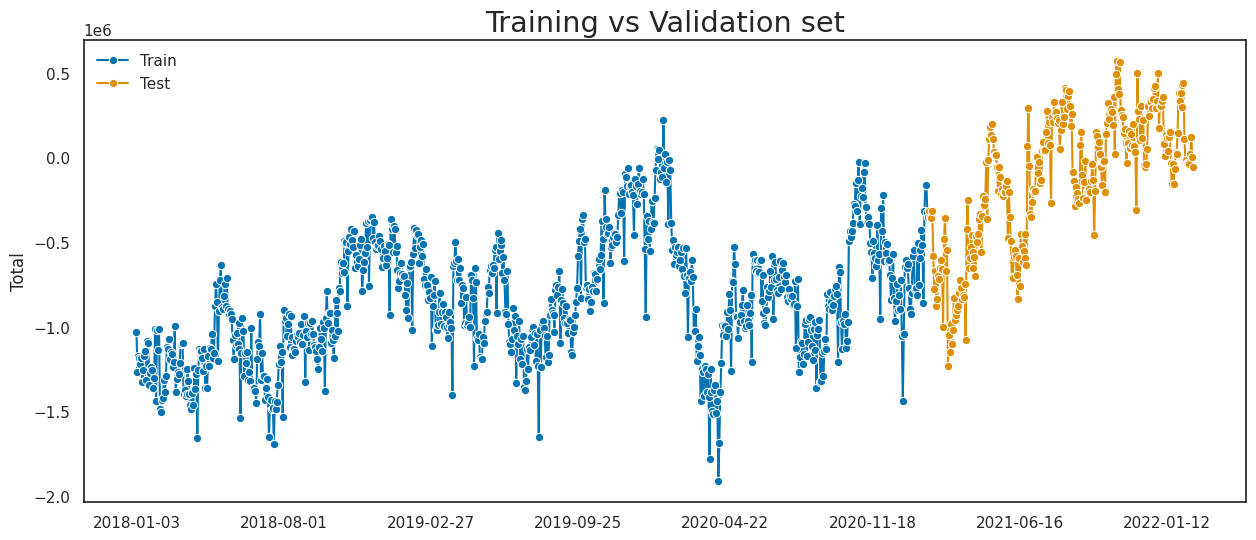

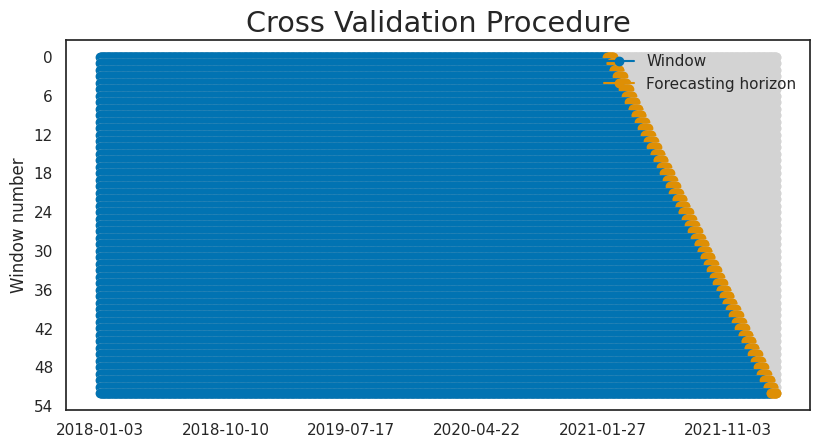

In [6]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')

model.plot_cv_procedure(xlabel='')

### Out-Of-sample Evaluation

In [7]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.035 minutes

Start Seasonal_Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.021 minutes

Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation completed in: 0.22 minutes

Start AutoETS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.321 minutes

Start AutoCES forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.364 minutes

Start AutoTheta forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.32 minutes

Start AutoTBATS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/tbats.py:949: UserWarning: Data contains zero or negative values, disabling Box-Cox transformation.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/tbats.py:949: UserWarning: Data contains zero or negative values, disabl

Evaluation completed in: 0.202 minutes


In [8]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
AutoCES,53,20.781866,0.252695,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,234310.282554,202910.433404,2.380641,-3.57098,191202.832396
AutoTBATS,53,7.024355,0.004578,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,238204.903417,208088.513354,2.43256,-3.877715,199115.494228
AutoARIMA,53,11.191257,1.06949,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,237754.470364,206280.077089,2.43395,-3.762781,196175.901873
AutoETS,53,18.300724,0.380719,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,238147.534496,206652.92483,2.444818,-3.755165,197137.529023
AutoTheta,53,14.304177,0.212149,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,237803.794367,206241.558534,2.481413,-3.794463,194992.660799
Naive,53,0.002715,0.038566,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,258015.72017,225728.720755,2.637399,-5.495392,214687.226415
Seasonal_Naive,53,0.00224,0.032265,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,258015.72017,225728.720755,2.637399,-5.495392,214687.226415


horizon                             1              2              3   \
Naive          RMSE      217658.446926  255603.409368  240322.045736   
               MAE       153070.000000  176554.754717  182075.849057   
               MAPE           1.498015       1.705223       2.118129   
               R2             0.699835       0.534624       0.640564   
               MedianAE   92519.000000  115083.000000  115729.000000   
Seasonal_Naive RMSE      217658.446926  255603.409368  240322.045736   
               MAE       153070.000000  176554.754717  182075.849057   
               MAPE           1.498015       1.705223       2.118129   
               R2             0.699835       0.534624       0.640564   
               MedianAE   92519.000000  115083.000000  115729.000000   
AutoARIMA      RMSE      192748.869309  224753.004683  208871.382752   
               MAE       147534.580519  157678.988147  162663.553389   
               MAPE           1.834995       1.555549       1.886410   
               R2             0.764607       0.640183       0.728486   
               MedianAE  116127.927265  107859.746472  119823.183575   
AutoETS        RMSE      192912.887254  225050.408011  209082.593209   
               MAE       148066.931047  157118.680662  162310.329281   
               MAPE           1.859074       1.545226       1.898841   
               R2             0.764206       0.639230       0.727936   
               MedianAE  124206.528692  112436.450841  115735.593018   
AutoCES        RMSE      191677.251248  221671.000073  207790.147556   
               MAE       147537.125350  155553.321565  161636.511424   
               MAPE           1.849884       1.554373       1.876592   
               R2             0.767217       0.649983       0.731290   
               MedianAE  127428.069336  114841.121094  113751.393555   
AutoTheta      RMSE      192978.087872  224626.035955  209005.010401   
               MAE       148367.265919  157422.286780  162953.453485   
               MAPE           1.876239       1.577653       1.922033   
               R2             0.764047       0.640589       0.728138   
               MedianAE  126376.934357  115136.115723  117642.280792   
AutoTBATS      RMSE      196071.106901  226156.245401  212506.285011   
               MAE       149859.573249  156151.744333  160824.699284   
               MAPE           1.934251       1.480986       1.765096   
               R2             0.756423       0.635676       0.718953   
               MedianAE  120780.504825  104172.209331  121916.843480   

horizon                             4              5              6   \
Naive          RMSE      248390.533043  288927.465595  300343.284741   
               MAE       204030.264151  241079.943396  256437.981132   
               MAPE           1.724340       2.454889       3.148571   
               R2             0.580898       0.511968       0.426344   
               MedianAE  179866.000000  220994.000000  219790.000000   
Seasonal_Naive RMSE      248390.533043  288927.465595  300343.284741   
               MAE       204030.264151  241079.943396  256437.981132   
               MAPE           1.724340       2.454889       3.148571   
               R2             0.580898       0.511968       0.426344   
               MedianAE  179866.000000  220994.000000  219790.000000   
AutoARIMA      RMSE      218050.462339  260530.636426  277237.179449   
               MAE       175212.422569  223541.923117  235954.922922   
               MAPE           1.607630       2.151641       3.197804   
               R2             0.677029       0.603185       0.511214   
               MedianAE  150382.506043  217454.526158  236144.471623   
AutoETS        RMSE      218400.189387  261479.265777  278058.888132   
               MAE       174738.457290  224185.687131  236848.864067   
               MAPE           1.606322       2.185837       3.204908   
               R2             0.675992 

In [9]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,Naive,AutoTBATS,AutoTBATS,AutoTBATS,AutoCES,AutoCES,AutoTBATS,AutoCES,AutoCES,AutoCES
Best_2,Seasonal_Naive,AutoETS,AutoCES,AutoCES,AutoARIMA,Naive,AutoCES,AutoARIMA,AutoTBATS,AutoARIMA
Best_3,AutoARIMA,AutoCES,AutoARIMA,AutoETS,AutoTBATS,Seasonal_Naive,AutoETS,AutoETS,AutoETS,AutoETS
Best_4,AutoCES,AutoARIMA,AutoETS,AutoARIMA,AutoETS,AutoARIMA,AutoARIMA,AutoTheta,AutoARIMA,AutoTheta
Best_5,AutoETS,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoETS,AutoTheta,AutoTBATS,AutoTheta,AutoTBATS
Best_6,AutoTheta,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,AutoTheta,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive
Best_7,AutoTBATS,Naive,Naive,Naive,Naive,AutoTBATS,Naive,Naive,Naive,Naive


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,,,
1,1.498015,1.498015,1.834995,1.859074,1.849884,1.876239,1.934251,1.849884,1.498015,1.892067,1.498015,1.764353
2,1.705223,1.705223,1.555549,1.545226,1.554373,1.577653,1.480986,1.554373,1.480986,1.517680,1.513106,1.589176
3,2.118129,2.118129,1.886410,1.898841,1.876592,1.922033,1.765096,1.876592,1.765096,1.820844,1.820844,1.940747
4,1.724340,1.724340,1.607630,1.606322,1.605675,1.666212,1.451247,1.605675,1.451247,1.528461,1.528461,1.626538
5,2.454889,2.454889,2.151641,2.185837,2.115937,2.192533,2.155703,2.115937,2.115937,2.135820,2.133789,2.244490
6,3.148571,3.148571,3.197804,3.204908,3.122857,3.236864,3.412165,3.122857,3.122857,3.267511,3.135714,3.210249
7,2.705122,2.705122,2.417277,2.414258,2.353028,2.469687,2.289609,2.353028,2.289609,2.321318,2.321318,2.479158
8,2.801347,2.801347,2.337747,2.353525,2.267001,2.377664,2.498490,2.267001,2.267001,2.382746,2.302374,2.491017
9,5.013684,5.013684,4.562241,4.546683,4.346337,4.648840,4.434256,4.346337,4.346337,4.390297,4.390297,4.652247


<Axes: title={'center': 'Out of Sample Performance'}, xlabel='horizon', ylabel='MAPE'>

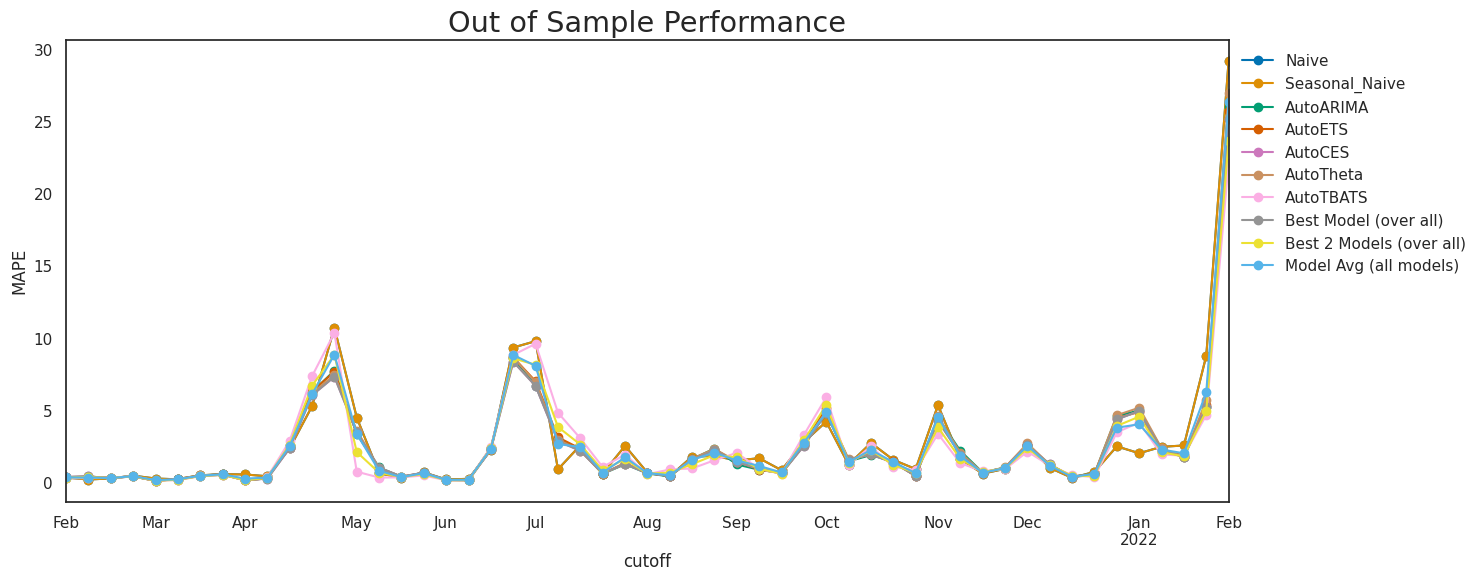

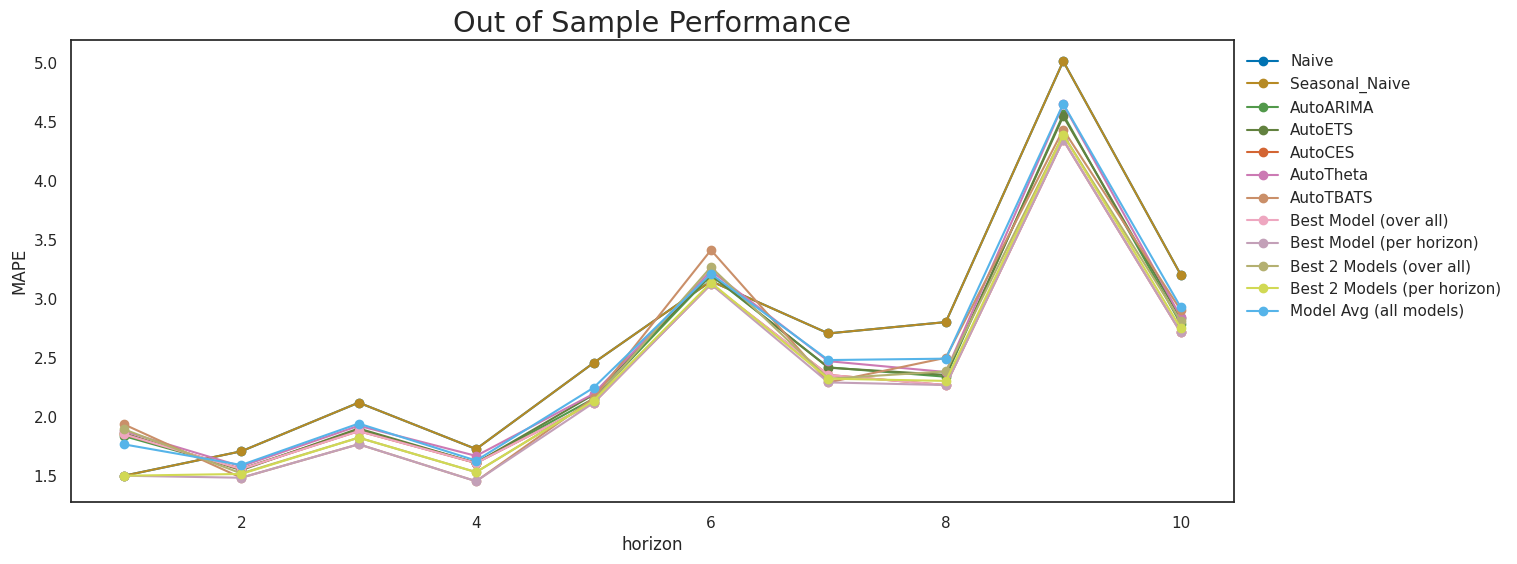

In [10]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')#, model_subset=subset)
model.plot_model_compare(score ='MAPE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])

Fitting Naive ...
Fitting Seasonal_Naive ...
Fitting AutoARIMA ...
Fitting AutoETS ...
Fitting AutoCES ...
Fitting AutoTheta ...
Fitting AutoTBATS ...


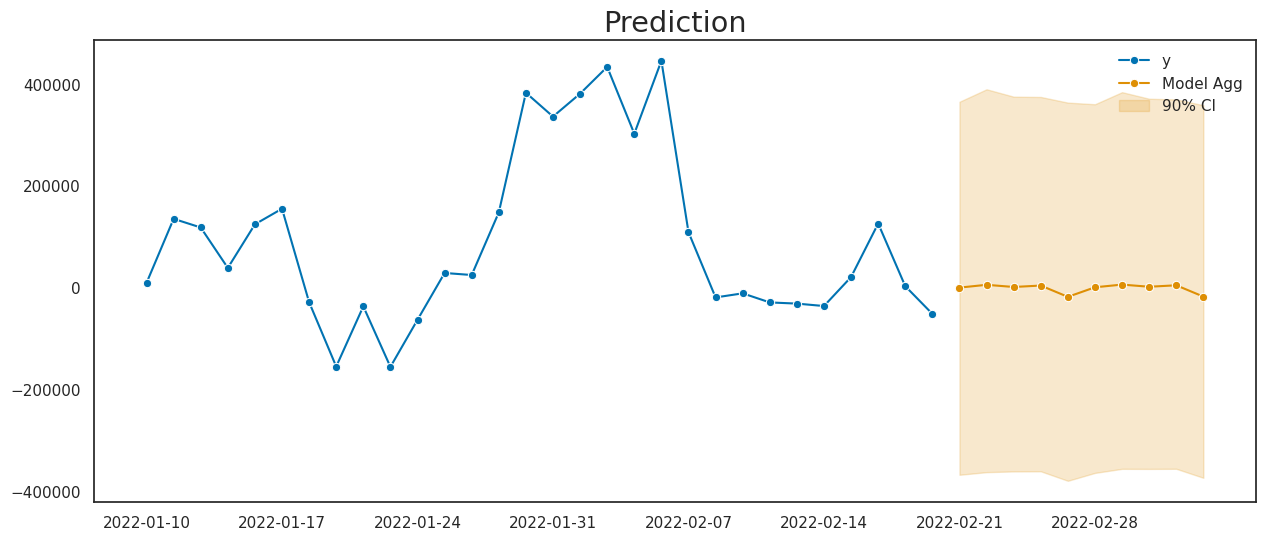

In [11]:
model.fit(verbose = True)
y_pred, y_pred_ints, preds, pred_ints = model.predict(mode='best_horizon', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     y_pred_interval = y_pred_ints)  

In [12]:
model.get_pred_errors()

,cutoff,horizon,error
0,2021-02-05,1,3193.112793
1,2021-02-12,1,-328508.818359
2,2021-02-19,1,24206.268555
3,2021-02-26,1,333362.066895
4,2021-03-05,1,-174278.138672
...,...,...,...
525,2022-01-07,10,-345051.471191
526,2022-01-14,10,297058.695312
527,2022-01-21,10,546776.289062
528,2022-01-28,10,-227052.953125


In [13]:
path = '../model_output/Total_AF_forecast.pkl'
model.save(path)